In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data= ImageDataGenerator(rescale=1./255,
                              horizontal_flip=True,
                              vertical_flip=True,
                              zoom_range=0.2,
                              shear_range=0.2,
                               width_shift_range=0.2,
                               height_shift_range=0.2)

In [3]:
test_data=ImageDataGenerator(rescale=1./255)

In [4]:
training_set= train_data.flow_from_directory('dataset/training_set',target_size=(64,64),batch_size=30)

Found 4000 images belonging to 2 classes.


In [5]:
test_set=test_data.flow_from_directory('dataset/test_set/',target_size=(64,64),batch_size=30)

Found 2000 images belonging to 2 classes.


In [6]:
cnn= tf.keras.Sequential([
    tf.keras.layers.Conv2D(30,activation='relu',input_shape=(64,64,3),strides=(2,2),kernel_size=3),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(60,activation='relu',kernel_size=3),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(90,activation='relu',kernel_size=3),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(2,activation='sigmoid')
])

In [7]:
opti= 'adam'
loss= 'binary_crossentropy'
metrics= ['accuracy']
epoch=25
batch_size=32

In [8]:
cnn.compile(optimizer=opti,loss=loss,metrics=metrics)

In [9]:
h= cnn.fit(training_set,validation_data=test_set,epochs=epoch,batch_size=batch_size)

Epoch 1/25
134/134 [==============================] - 35s 258ms/step - loss: 0.6947 - accuracy: 0.5116 - val_loss: 0.7227 - val_accuracy: 0.5060
Epoch 2/25
134/134 [==============================] - 34s 254ms/step - loss: 0.6864 - accuracy: 0.5464 - val_loss: 0.6718 - val_accuracy: 0.5725
Epoch 3/25
134/134 [==============================] - 32s 242ms/step - loss: 0.6564 - accuracy: 0.6158 - val_loss: 0.6573 - val_accuracy: 0.6040
Epoch 4/25
134/134 [==============================] - 32s 237ms/step - loss: 0.6561 - accuracy: 0.6151 - val_loss: 0.6556 - val_accuracy: 0.6130
Epoch 5/25
134/134 [==============================] - 32s 238ms/step - loss: 0.6473 - accuracy: 0.6189 - val_loss: 0.6532 - val_accuracy: 0.6400
Epoch 6/25
134/134 [==============================] - 32s 238ms/step - loss: 0.6374 - accuracy: 0.6320 - val_loss: 0.6648 - val_accuracy: 0.6265
Epoch 7/25
134/134 [==============================] - 32s 238ms/step - loss: 0.6313 - accuracy: 0.6385 - val_loss: 0.6265 - val_ac

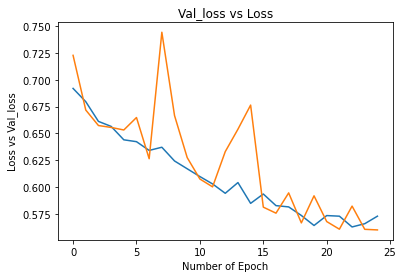

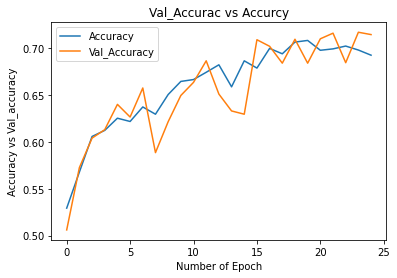

In [10]:
import matplotlib.pyplot as plt

N= np.arange(0,epoch)
accuracy= h.history['accuracy']
loss= h.history['loss']
val_acc= h.history['val_accuracy']
val_loss= h.history['val_loss']


plt.figure()
plt.plot(N,loss,label= 'Loss')
plt.plot(N,val_loss,label='Val_loss')
plt.title('Val_loss vs Loss')
plt.xlabel('Number of Epoch')
plt.ylabel('Loss vs Val_loss')

plt.figure()
plt.plot(N,accuracy,label= 'Accuracy')
plt.plot(N,val_acc,label='Val_Accuracy')
plt.title('Val_Accurac vs Accurcy')
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy vs Val_accuracy')
plt.legend();

In [11]:
import cv2

width = 64
height = 64
image = cv2.imread("dataset/single_prediction/cat_or_dog_1.jpg")
output = image.copy()
image = cv2.resize(image, (width, height))
image = image.astype("float") / 255.0

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

preds = cnn.predict(image,batch_size=10)

In [12]:
i = preds.argmax(axis=1)[0]

In [13]:
if i>0.5:
    print( "is a cat")
    
else:
    print("is a dog")

is a dog


In [14]:
width = 64
height = 64
image = cv2.imread("dataset/single_prediction/cat_or_dog_2.jpg")
output = image.copy()
image = cv2.resize(image, (width, height))
image = image.astype("float") / 255.0

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

preds = cnn.predict(image,batch_size=10)
i = preds.argmax(axis=1)[0]

if i>0.5:
    print( "is a cat")
    
else:
    print("is a dog")

is a dog


In [15]:
width = 64
height = 64
image = cv2.imread("dataset/single_prediction/cat.2000.jpg")
output = image.copy()
image = cv2.resize(image, (width, height))
image = image.astype("float") / 255.0

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

preds = cnn.predict(image)
i = preds.argmax(axis=1)[0]

if i>0.5:
    print( "is a cat")
    
else:
    print("is a dog")

is a cat


In [16]:
width = 64
height = 64
image = cv2.imread("dataset/single_prediction/cat.2005.jpg")
output = image.copy()
image = cv2.resize(image, (width, height))
image = image.astype("float") / 255.0

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

preds = cnn.predict(image)
i = preds.argmax(axis=1)[0]

if i>0.5:
    print( "is a cat")
    
else:
    print("is a dog")

is a cat


In [17]:
width = 64
height = 64
image = cv2.imread("dataset/single_prediction/dog.2009.jpg")
output = image.copy()
image = cv2.resize(image, (width, height))
image = image.astype("float") / 255.0

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

preds = cnn.predict(image)
i = preds.argmax(axis=1)[0]

if i>0.5:
    print( "is a cat")
    
else:
    print("is a dog")

is a dog
